# 숫자 집합 candidates 를 조합하여 합이 target 이 되는 원소를 나열하라. 
# 각 원소는 중복으로 나열 가능하다.

- 예제
    - 입력
    ```python
    candidates = [2,3,6,7], target = 7
    ```

    - 출력

    ```python
    [
        [7],
        [2,2,3]
    ]
    ```

In [1]:
# DFS로 중복 조합 그래프 탐색

from typing import List
candidates = [2,3,6,7]
target = 7


def combinationTarget(lst:List[int])->List[List[int]]:
    result = []

    def dfs(csum, index, path):
        # 종료조건
        if csum < 0:
            return
        if csum == 0:
            result.append(path)
            return
        
        # 자신부터 하위 원소까지의 나열 재귀 호출
        for i in range(index, len(candidates)):
            dfs(csum - candidates[i], i, path + [candidates[i]])
    dfs(target, 0, [])
    return result

In [2]:
combinationTarget(candidates)

[[2, 2, 3], [7]]

1. 모든 중복조합에서 찾아야 하기 때문에, 이 그림과 같이 항상 부모의 값부터 시작하는 그래프로 구성할 수 있다.
2. 만약 조합이 아니라 순열을 찾는 문제라면 자식 노드는 항상 처음부터 시작해야해서 훨씬 더 많은 계산이 필요할 것이다.
3. 그러나 조합은 각각의 노드가 자기 자신부터 하위 원소까지의 나열로만 정리할 수 있다. 

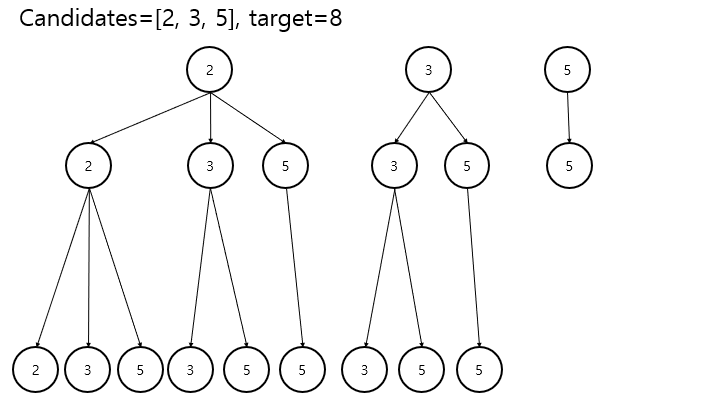

1. DFS 로 재귀호출하되, dfs() 의 첫번쨰 파라미터는 합을 갱신해나갈 csum 이다. 
2. 두번째 파라미터는 순서(자기 자신을 포함하는), 세번째 파라미터는 지금까지의 탐색 경로로 정한다.
3. 그런데 이 탐색 코드는 종료 조건이 없으며, 자기 자신을 포함하기 때문에 무한히 탐색하게 될 것이다. 따라서 종료조건이 필요하다.
4. 종료조건은 다음 2가지 경우이다.
    - csum < 0 (마이너스인 경우): 목표값을 초과한 경우로 탐색을 종료한다.
    - csum = 0: csum 의 초기값은 target 이며 따라서 csum 이 0인 경우 정답이므로 결과 리스트에 추가하고 탐색을 종료한다.

5. 입력값에 0 이 포함되어 있다면 무한히 탐색하므로, 예외처리를 해줘야 한다. 
6. 조합이 아닌 순열 문제로 풀이하려면 i가 아닌 0 을 기입하면 된다. 그렇게 하면 항상 첫번쨰 값부터 탐색을 시도하여 순열로 풀이할 수 있을 것이다.